# Predccion de valor de una accion en el tiempo


In [1]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [2]:
stock = pd.read_csv('history_60d.csv')
stock.head()

,date,symbol,volume,open,close,high,low,adjclose
0,2019-03-01,A,1625900,80.000000,81.239998,81.440002,80.000000,81.239998
1,2019-02-28,A,1759100,79.180000,79.440002,79.750000,78.889999,79.440002
2,2019-02-27,A,1254400,78.250000,79.419998,79.550003,78.250000,79.419998
3,2019-02-26,A,1992600,79.209999,78.550003,79.269997,78.419998,78.550003
4,2019-02-25,A,1878000,78.900002,79.339996,79.839996,78.849998,79.339996


In [3]:
%pwd

'/home/jovyan/stock_vray/amex-nyse-nasdaq-stock-histories'

# Solo tomo la dataset de la variacion del stock que me importa en este caso VMW 

In [4]:

VMW= pd.read_csv('VMW.csv')#
VMW.head()

,date,volume,open,close,high,low,adjclose
0,2019-03-01,2909400,177.869995,178.199997,183.410004,175.649994,178.199997
1,2019-02-28,2417600,175.070007,171.809998,175.699997,171.259995,171.809998
2,2019-02-27,1359700,175.240005,176.009995,176.660004,173.589996,176.009995
3,2019-02-26,2136700,173.839996,175.119995,176.059998,171.929993,175.119995
4,2019-02-25,1218200,174.600006,174.149994,175.699997,173.179993,174.149994


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


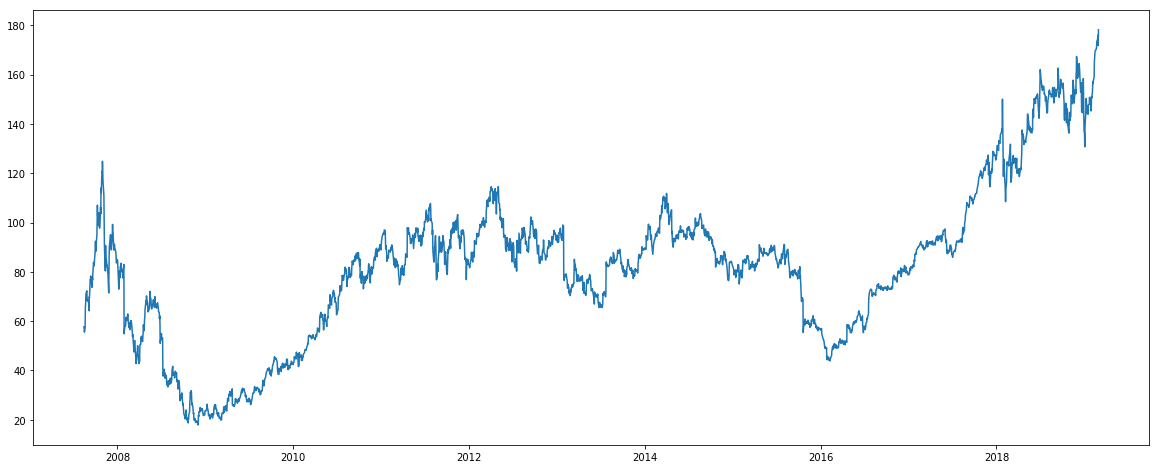

In [5]:
#puse el indice como la fecha para ver el estado historico de los datos a lo largo de los anos
VMW.date = pd.to_datetime(VMW.date,format='%Y-%m-%d')
VMW.index = VMW['date']

#plottter del histpgrama type
plt.figure(figsize=(20,8))
plt.plot(VMW.close, label='Close Price history')


#VMW['date'] =  pd.to_datetime(VMW['date'],format='%Y-%m-%d')
#VMW["date"] = VMW["date"].dt.strftime('%Y%m%d').astype(float)
#VMW=VMW.convert_objects(convert_numeric=True)
#print(VMW.info(),VMW.head())

In [6]:
#sns.pairplot(VMW)

In [67]:
VMW.corr()

,date,volume,open,close,high,low,adjclose
date,1.000000,-0.147876,0.644462,0.645701,0.637536,0.654135,0.645442
volume,-0.147876,1.000000,-0.052535,-0.056937,-0.038877,-0.069402,-0.060043
open,0.644462,-0.052535,1.000000,0.998362,0.999231,0.999017,0.991739
close,0.645701,-0.056937,0.998362,1.000000,0.999101,0.999284,0.993691
high,0.637536,-0.038877,0.999231,0.999101,1.000000,0.998678,0.992587
low,0.654135,-0.069402,0.999017,0.999284,0.998678,1.000000,0.992771
adjclose,0.645442,-0.060043,0.991739,0.993691,0.992587,0.992771,1.000000


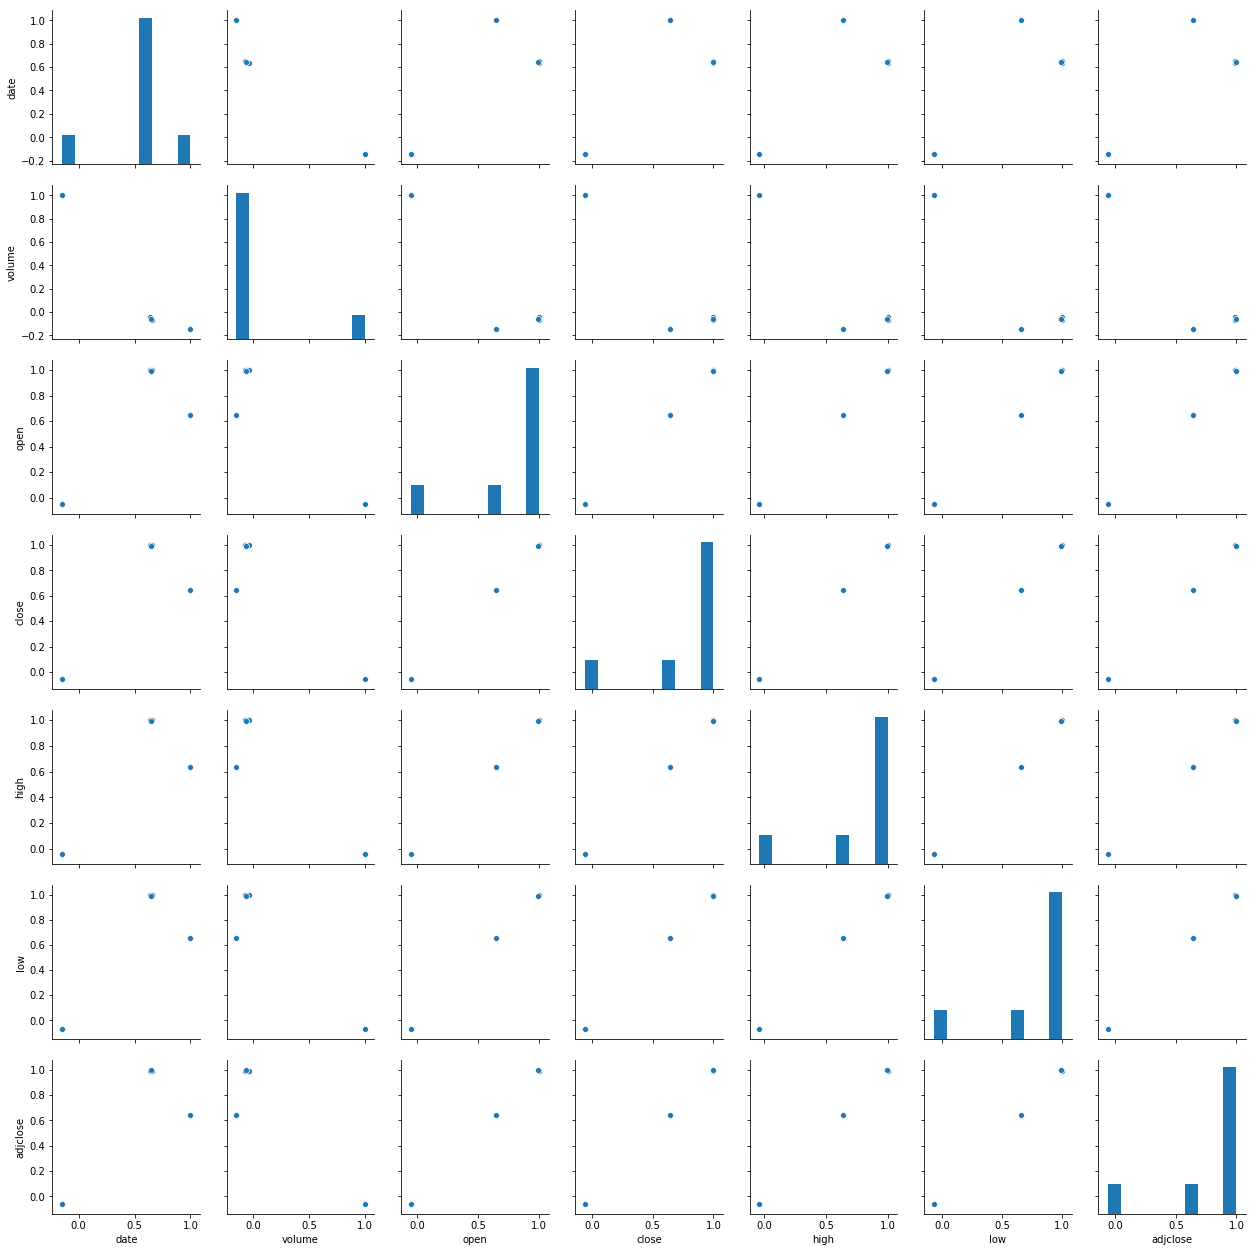

In [82]:
sns.pairplot(VMW.corr())

Se elijen 3 variables para empezar a probar el modelo, luego metemos todas las demas

In [86]:
X = VMW[['low','open','adjclose',]]
X.head()

,low,open,adjclose
date,,,
2019-03-01,175.649994,177.869995,178.199997
2019-02-28,171.259995,175.070007,171.809998
2019-02-27,173.589996,175.240005,176.009995
2019-02-26,171.929993,173.839996,175.119995
2019-02-25,173.179993,174.600006,174.149994


In [87]:
y=VMW.close
y.head()

date
2019-03-01    178.199997
2019-02-28    171.809998
2019-02-27    176.009995
2019-02-26    175.119995
2019-02-25    174.149994
Name: close, dtype: float64

In [132]:
# Dividimos entrenamiento y prueba
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)
print(x_train)
print(x_test)

                  date    volume        open        high         low  \
date                                                                   
2010-03-08  20100308.0   1496600   53.889999   54.680000   53.500000   
2016-06-16  20160616.0   2388800   60.090000   61.250000   59.720001   
2018-04-13  20180413.0   2900900  123.000000  123.000000  120.529999   
2012-04-17  20120417.0   1137600  109.800003  110.870003  109.339996   
2018-02-01  20180201.0   4291200  123.449997  129.339996  122.580002   
2014-05-19  20140519.0    991900   93.769997   95.739998   93.690002   
2013-10-16  20131016.0   1985800   77.910004   79.879997   77.900002   
2012-03-30  20120330.0   1484300  112.959999  113.760002  110.800003   
2010-02-11  20100211.0   1184900   45.470001   46.520000   45.009998   
2019-01-25  20190125.0   1176100  149.699997  150.330002  148.389999   
2009-02-25  20090225.0    943600   22.930000   22.930000   21.830000   
2015-03-26  20150326.0   1262900   81.690002   82.900002   81.66

In [94]:
# Modelo para ML
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [95]:
lm.intercept_

0.7779724046284429

In [96]:
lm.coef_

array([0.86160121, 0.04030642, 0.12184793])

In [97]:
y_pred = lm.predict(x_test)
y_pred

array([ 98.19509807,  23.16580623,  74.22774784, 109.67600541,
        60.28186755,  95.16089937,  88.02146972, 105.03342683,
        93.28104707, 113.83401554,  86.81068139,  83.43046693,
        52.90913476, 158.57790712,  67.89402867, 100.46904693,
        97.04191138,  65.97301641,  89.33539298,  80.21026293,
        69.16811157,  20.41167881,  88.07786563,  52.79772619,
        79.65856152,  88.52024997, 138.31987364,  74.45339445,
        98.69989374,  21.62608086,  92.24280606,  78.35424871,
        76.97528698,  75.23221634,  53.16110036,  76.72716043,
        96.68668064, 133.55385904, 121.13771353, 120.41585592,
        76.96617682,  56.2961213 ,  86.95914745, 131.47212019,
        71.75233101, 141.86112125,  23.51655124,  81.73203669,
        88.97925212,  54.33564069,  94.85314244, 109.01529221,
        88.80196166,  65.85655269, 140.76109301, 151.4836114 ,
        43.14378614,  84.20155364,  90.13360086,  88.9543672 ,
        58.5784246 ,  80.01313293, 106.44022749,  96.54

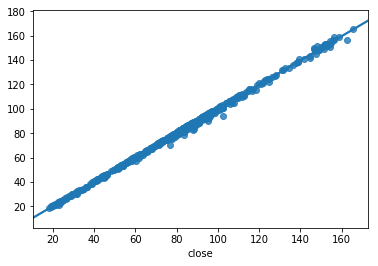

In [98]:
sns.regplot(x = y_test, y = y_pred)

In [99]:
from sklearn.metrics import mean_squared_error

In [100]:
mean_squared_error(y_test, y_pred)

1.223308893493093

In [101]:
VMW.keys()

Index(['date', 'volume', 'open', 'close', 'high', 'low', 'adjclose'], dtype='object')

In [104]:
#Metamos más varibales a ver si se hace más chico el MSE
X = VMW.drop('close', axis = 1)#se quita de las columnas la variable preduictora por que la correlacion seria igual  ejemplo valor predecido de X casa coparado con el valos de la misma casa eso no
print(X)
y = VMW.close

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

lm.fit(x_train, y_train)

lm.intercept_ , lm.coef_

                  date    volume        open        high         low  \
date                                                                   
2019-03-01  20190301.0   2909400  177.869995  183.410004  175.649994   
2019-02-28  20190228.0   2417600  175.070007  175.699997  171.259995   
2019-02-27  20190227.0   1359700  175.240005  176.660004  173.589996   
2019-02-26  20190226.0   2136700  173.839996  176.059998  171.929993   
2019-02-25  20190225.0   1218200  174.600006  175.699997  173.179993   
2019-02-22  20190222.0   1136300  171.500000  173.449997  170.429993   
2019-02-21  20190221.0   1237700  170.149994  172.580002  168.690002   
2019-02-20  20190220.0   1220100  169.850006  171.119995  168.850006   
2019-02-19  20190219.0   1223000  169.449997  170.559998  167.809998   
2019-02-15  20190215.0   1208700  168.289993  169.699997  167.119995   
2019-02-14  20190214.0   1366200  166.160004  170.110001  165.929993   
2019-02-13  20190213.0   1825500  165.419998  167.649994  163.33

(45.11684141246982,
 array([-2.23156189e-06, -2.71047290e-08, -5.00496090e-01,  7.01152154e-01,
         7.49183942e-01,  5.92971026e-02]))

In [61]:
#stock.date= stock.date.astype(float)

#print(VMW.info())

In [105]:
#VMW.info()

[ 97.69311848  24.13802945  74.31624297 110.88639102  59.93182511
  94.55393774  87.41004852 106.12911071  92.7669233  116.34150401
  86.12061229  83.00759901  53.36573138 156.25078229  67.73262971
 100.46201441  96.90339663  65.38627371  89.32342788  80.42867309
  68.59790776  20.14026587  88.11336117  53.0120462   78.9980171
  88.00904817 139.89179675  73.9403615   98.85215591  21.55704116
  92.36501967  82.98221409  76.55282436  76.82510787  55.21959319
  76.73461897  98.28982693 134.63616062 123.62527568 120.26766324
  76.98530839  55.82474712  86.12883171 131.88312526  70.98375101
 142.80820728  23.26227334  83.65503183  88.79669955  53.74551823
  95.00504346 108.98044687  88.07085281  66.57960938 141.49209198
 149.53439933  42.98534986  84.44031082  89.52825247  89.14980847
  58.51644642  79.41559514 107.22405789  96.10173068  78.35429274
  93.69351975  52.23771325  35.89604165 147.44942324  81.216114
  23.35172802  73.61829167  95.69456614  74.53439283  83.52886182
  70.4630008 

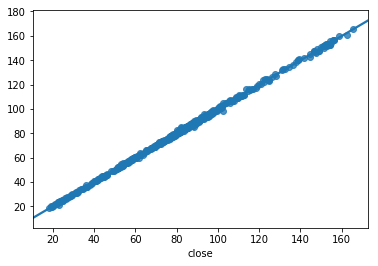

In [106]:
y_pred = lm.predict(x_test)
print (y_pred)
sns.regplot(x = y_test, y = y_pred) #mi scatter es igual

In [134]:
mean_squared_error(y_test, y_pred)

0.5096932711334736

In [141]:
#plt.plot(y_test)

#plt.figure(figsize=(20,8))
#plt.plot(y_pred, label='Close Price Predict')



#plt.plot(x_test,y_pred)

#plt.plot(valid[['Close', 'Predictions']])
print(x_test)
data=data.sort_index(ascending=True, axis=0)

                  date   volume        open        high         low  \
date                                                                  
2012-08-17  20120817.0  1548200   98.550003   98.949997   96.970001   
2008-12-09  20081209.0  2767100   22.600000   24.879999   22.200001   
2013-02-15  20130215.0  3713800   73.379997   74.959999   73.010002   
2014-04-01  20140401.0  2156400  108.290001  111.830002  108.190002   
2016-07-11  20160711.0  1790700   59.290001   60.150002   59.290001   
2014-07-11  20140711.0   784800   95.800003   95.970001   94.000000   
2017-06-30  20170630.0  1143700   87.129997   87.750000   86.910004   
2011-07-22  20110722.0  1802500  104.410004  107.449997  103.580002   
2012-06-07  20120607.0  1509400   95.000000   95.000000   92.080002   
2012-04-19  20120419.0  4712600  113.779999  118.790001  112.529999   
2013-12-10  20131210.0  2078800   86.699997   86.949997   85.620003   
2015-03-30  20150330.0   810600   82.519997   83.320000   82.320000   
2010-0

            close        date          y
date                                    
2007-08-17    NaN  20070817.0  55.549999
2007-08-24    NaN  20070824.0  71.300003
2007-08-31    NaN  20070831.0  68.889999
2007-09-10    NaN  20070910.0  76.760002
2007-09-24    NaN  20070924.0  83.830002


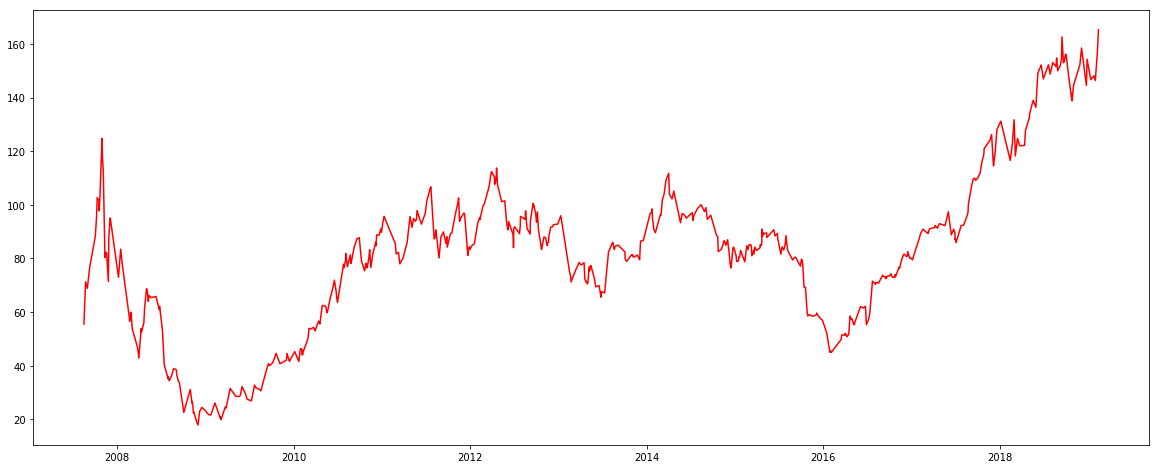

In [149]:
#puse el indice como la fecha para ver la PREDICCION de los datos a lo largo de los anos


#data = pd.DataFrame(x_test, columns=['close', 'date'])
#data=data.sort_index(ascending=True, axis=0)
#data['y']=y_test
#print(data.head())

#data.index=data.date


#plt.figure(figsize=(20,8))
#plt.plot(y_test, label='Close Price Predictions')



data = pd.DataFrame(x_test, columns=['close', 'date'])
data['y']=y_test
data.sort_index(inplace=True)
print(data.head()) #esta tiene que venir odernada

plt.figure(figsize=(20,8))
plt.plot(data.y, label='Close Price Predictions', color= 'red')


#data = pd.DataFrame(X_test, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']) # Convertir x_test a dataframe (poner nombres de columnas)
#data['y'] = y_test # Agregar y test como columna
#print(data.head())
#Falta data para poner a aprender el modelo pendejo bastardo!!